In [ ]:
# 예제 5.1 sklearn 패키지의 20 news groups 데이터 세트를 가져오는 코드

from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# making class names shorter
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]

print(class_names)

class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'
print(class_names)


['atheism', 'graphics', 'ms-windows.misc', 'hardware', 'hardware', 'x', 'misc.forsale', 'autos', 'motorcycles', 'baseball', 'hockey', 'crypt', 'electronics', 'med', 'space', 'christian', 'guns', 'mideast', 'politics.misc', 'religion.misc']
['atheism', 'graphics', 'ms-windows.misc', 'pc.hardware', 'mac.hardware', 'x', 'misc.forsale', 'autos', 'motorcycles', 'baseball', 'hockey', 'crypt', 'electronics', 'med', 'space', 'christian', 'guns', 'mideast', 'politics.misc', 'religion.misc']


In [ ]:
# 예제 5.2 제보 기사의 카테고리를 분류하는 모델을 만들고 F1-점수를 측정하는 코드

import sklearn
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB

# TF-IDF를 사용해서 문서를 숫자 벡터로 변환하는 전처리 과정
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

# learning
nb = MultinomialNB(alpha=.01)
nb.fit(train_vectors, newsgroups_train.target)

# testing
pred = nb.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')


0.8350184193998174

In [ ]:
# 예제 5.3 파이프라인 기술을 사용해 테스트 데이터 인덱스 0번에 데이터 벡터라이저와 카테고리 분류를 한꺼번에 수행하는 과정

from sklearn.pipeline import make_pipeline
pipe = make_pipeline(vectorizer, nb)
predict_classes = pipe.predict_proba([newsgroups_test.data[0]]).round(3)[0]

print(predict_classes)


[0.001 0.01  0.003 0.047 0.006 0.002 0.003 0.521 0.022 0.008 0.025 0.
 0.331 0.003 0.006 0.    0.003 0.    0.001 0.009]


In [ ]:
# 예제 5.4 데이터 분류 결과의 가독성을 높이기 위해 출력을 수정하는 코드

rank = sorted(range(len(predict_classes)), key=lambda i: predict_classes[i], reverse=True)
for rank_index in rank:
    print('[{:>5}] \t{:<3}\tclass ({:.1%})'.format(rank.index(rank_index) + 1, rank_index, predict_classes[rank_index]))


[    1] 	7  	class (52.1%)
[    2] 	12 	class (33.1%)
[    3] 	3  	class (4.7%)
[    4] 	10 	class (2.5%)
[    5] 	8  	class (2.2%)
[    6] 	1  	class (1.0%)
[    7] 	19 	class (0.9%)
[    8] 	9  	class (0.8%)
[    9] 	4  	class (0.6%)
[   10] 	14 	class (0.6%)
[   11] 	2  	class (0.3%)
[   12] 	6  	class (0.3%)
[   13] 	13 	class (0.3%)
[   14] 	16 	class (0.3%)
[   15] 	5  	class (0.2%)
[   16] 	0  	class (0.1%)
[   17] 	18 	class (0.1%)
[   18] 	11 	class (0.0%)
[   19] 	15 	class (0.0%)
[   20] 	17 	class (0.0%)


In [ ]:
# 예제 5.5 LIME 텍스트 설명체를 선언하는 코드

! pip install lime

from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
# 예제 5.6 LIME의 explain_instance 메서드에 필요한 최소한의 파라미터를 넣었다

exp = explainer.explain_instance(newsgroups_test.data[0], pipe.predict_proba, top_labels=1)

split() requires a non-empty pattern match.


In [ ]:
# 예제 5.7 LIME이 잘 작동하는지 확인하기 위한 메서드

exp.available_labels()

[7]

In [ ]:
# 예제 5.8 explainer가 0번 테스트 데이터를 해석한 결과를 iPython 노트북으로 출력하는 코드

exp.show_in_notebook(text=newsgroups_test.data[0])

In [ ]:
# 예제 5.9 테스트 데이터 5번을 LIME 알고리즘에 입력하는 코드

from lime.lime_text import LimeTextExplainer

idx = 5

explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(newsgroups_test.data[idx], pipe.predict_proba, top_labels=1)
predict_classes = pipe.predict_proba([newsgroups_test.data[idx]]).round(3)[0]
rank = sorted(range(len(predict_classes)), key=lambda i: predict_classes[i], reverse=True)

print('Document id: %d' % idx)
print('Predicted class: %s' % class_names[nb.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[newsgroups_test.target[idx]])
print(predict_classes)

print(rank)
print ('Explanation for class %s' % class_names[rank[0]])
print ('\n'.join(map(str, exp.as_list(rank[0]))))

exp.show_in_notebook(text=newsgroups_test.data[idx])

split() requires a non-empty pattern match.


Document id: 5
Predicted class: med
True class: med
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]
Explanation for class med
('fungus', 0.001639867543079976)
('infection', 0.001604138623743136)
('yeast', 0.0015525958446041238)
('Candida', 0.0014802492187345109)
('candida', 0.0014374954360360217)
('ocom', 0.0014308177163502465)
('infections', 0.0012992497818976093)
('mucosal', 0.001231287901317231)
('Yeast', 0.0012205686521592895)
('deficiency', 0.001130419477412044)


(-0.5, 1279.5, 1279.5, -0.5)

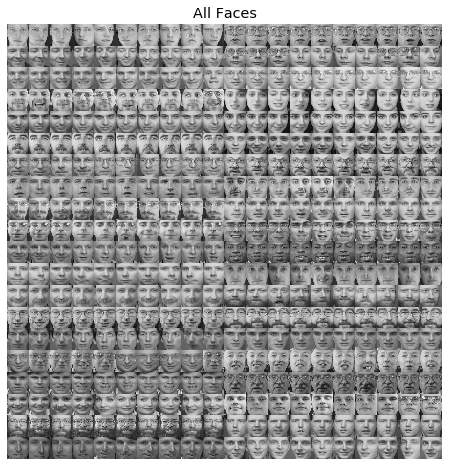

In [ ]:
# 예제 5.10 scikit-image 패키지를 사용해서 올리베티 얼굴 데이터를 로드하고 확인하는 코드

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray

from skimage.util import montage

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

# make each image color so lime_image works correctly

X_vec = np.stack([gray2rgb(iimg) for iimg in faces.data.reshape((-1, 64, 64))],0)
y_vec = faces.target.astype(np.uint8)

%matplotlib inline

fig, ax1 = plt.subplots(1,1, figsize = (8,8))
ax1.imshow(montage(X_vec[:,:,:,0]), cmap='gray', interpolation = 'none')
ax1.set_title('All Faces')
ax1.axis('off')


(-0.5, 63.5, 63.5, -0.5)

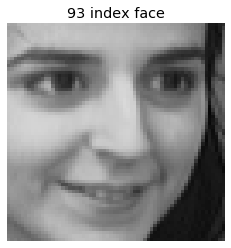

In [ ]:
# 예제 5.11 이미지 데이터 한 장을 그리는 코드

index = 93
plt.imshow(X_vec[index], cmap='gray')
plt.title('{} index face'.format(index))
plt.axis('off')

In [ ]:
# 예제 5.12 텐서플로를 이용한 분류 모델을 LIME에서 사용할 수 있게 컨벤션을 맞추는 코드

def predict_proba(image):
    return session.run(model_predict, feed_dict={preprocessed_image: image})

In [ ]:
# 예제 5.13 sklearn 패키지에 있는 train_test_split 함수를 사용해서 X_vec과 y_vec으로부터 학습용과 테스트용 데이터세트를 분리하는 코드

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y_vec, train_size=0.70)

In [ ]:
# 예제 5.14 MLP가 학습할 수 있도록 이미지 전처리를 수행하는 파이프라인 생성

from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
class PipeStep(object):
    """ Wrapper for turning functions into pipeline transforms (no-fitting) """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)

makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])
simple_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('MLP', MLPClassifier(
        activation='relu',
        hidden_layer_sizes=(400, 40),
    random_state=1))
])


In [ ]:
# 예제 5.15 학습 데이터를 MLP가 있는 파이프라인에 붓는 코드


simple_pipeline.fit(X_train, y_train)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Pipeline(memory=None,
         steps=[('Make Gray', <__main__.PipeStep object at 0x7f4ebe359ac8>),
                ('Flatten Image', <__main__.PipeStep object at 0x7f4ebe359668>),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(400, 40),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=1, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
# 예제 5.16 classification_report를 사용해서 모델 성능을 테스트하는 코드

def test_model(X_test, y_test):
  pipe_pred_test = simple_pipeline.predict(X_test)
  pipe_pred_prop = simple_pipeline.predict_proba(X_test)

  from sklearn.metrics import classification_report
  print(classification_report(y_true=y_test, y_pred = pipe_pred_test))

test_model(X_test, y_test)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         1
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         2
           9       1.00      0.40      0.57         5
          10       1.00      1.00      1.00         3
          11       0.43      1.00      0.60         3
          12       0.50      1.00      0.67         1
          13       0.80      1.00      0.89         4
          14       0.50      0.50      0.50         2
          15       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         2
          18       0.80    

In [ ]:
# 예제 5.17 Normalizer 전처리 과정을 추가해서 MLP를 학습시키는 코드

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPClassifier
class PipeStep(object):
    """ Wrapper for turning functions into pipeline transforms (no-fitting) """
    def __init__(self, step_func):
        self._step_func=step_func
    def fit(self,*args):
        return self
    def transform(self,X):
        return self._step_func(X)


makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('Normalize', Normalizer()),
    # add Normalizer preprocessing step
    ('MLP', MLPClassifier(
        activation='relu',
        hidden_layer_sizes=(400, 40),
        random_state=1)),
])

simple_pipeline.fit(X_train, y_train)

test_model(X_test, y_test)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       1.00      0.75      0.86         4
           3       1.00      0.20      0.33         5
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.50      0.67      0.57         3
           8       1.00      1.00      1.00         2
           9       0.75      0.60      0.67         5
          10       1.00      1.00      1.00         3
          11       0.67      0.67      0.67         3
          12       0.14      1.00      0.25         1
          13       0.80      1.00      0.89         4
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          16       0.00      0.00      0.00         0
          17       0.67    

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [ ]:
# 예제 5.18 필자가 찾은 최적의 파이프라인 조합

simple_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('Normalize', Normalizer()),
    # add Normalizer preprocessing step
    ('MLP', MLPClassifier(
        activation='relu',
        alpha=1e-7,
        epsilon=1e-6,
        hidden_layer_sizes=(800, 120),
        random_state=1)),
])

simple_pipeline.fit(X_train, y_train)

test_model(X_test, y_test)

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       1.00      0.25      0.40         4
           3       1.00      0.60      0.75         5
           4       1.00      1.00      1.00         3
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         1
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         2
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.33      1.00      0.50         1
          13       0.80      1.00      0.89         4
          14       0.67      1.00      0.80         2
          15       0.67      1.00      0.80         2
          16       0.00      0.00      0.00         0
          17       1.00    

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [ ]:
# 예제 5.19 LIME의 이미지 설명체와 이미지 분할 알고리즘을 선언하는 코드

from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

explainer = lime_image.LimeImageExplainer()

# segmenter algorithms: quickshift(default), slic, felzenszwalb
segmenter = SegmentationAlgorithm(
        'slic',
        n_segments=100,
        compactness=1,
        sigma=1)


In [ ]:
# 예제 5.20 테스트 0번 이미지에 대해 설명 모델을 구축하는 코드

%%time

olivetti_test_index = 0

exp = explainer.explain_instance(
    X_test[olivetti_test_index],
    classifier_fn = simple_pipeline.predict_proba,
    top_labels=6,
    num_samples=1000,
    segmentation_fn=segmenter)


CPU times: user 2.85 s, sys: 916 ms, total: 3.77 s
Wall time: 2.11 s


Text(0.5, 1.0, 'Show mask only')

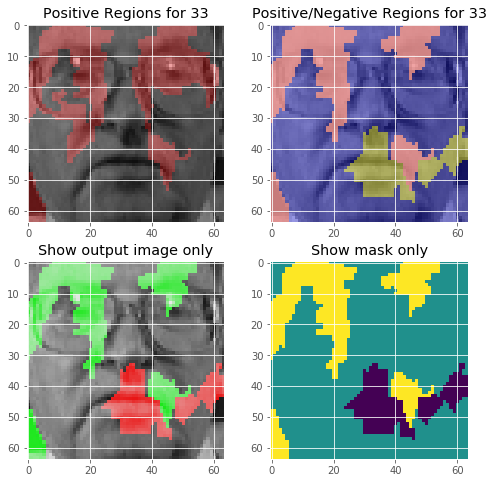

In [ ]:
# 예제 5.21 올리베티 데이터 0번을 설명체에 통과시켜 XAI를 수행하는 코드

from skimage.color import label2rgb
# set canvas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (8, 8))

# show positive segments
temp, mask = exp.get_image_and_mask(
    y_test[olivetti_test_index],
    positive_only=True,
    num_features=8,
    hide_rest=False)

ax1.imshow(
        label2rgb(mask, temp, bg_label = 0),
        interpolation = 'nearest')

ax1.set_title('Positive Regions for {}'.format(y_test[olivetti_test_index]))

# show all segments
temp, mask = exp.get_image_and_mask(
    y_test[olivetti_test_index],
    positive_only=False,
    num_features=8,
    hide_rest=False)

ax2.imshow(
    label2rgb(4 - mask, temp, bg_label = 0),
    interpolation = 'nearest')

ax2.set_title('Positive/Negative Regions for {}'.format(y_test[olivetti_test_index]))

# show image only
ax3.imshow(temp, interpolation = 'nearest')
ax3.set_title('Show output image only')

# show mask only
ax4.imshow(mask, interpolation = 'nearest')
ax4.set_title('Show mask only')

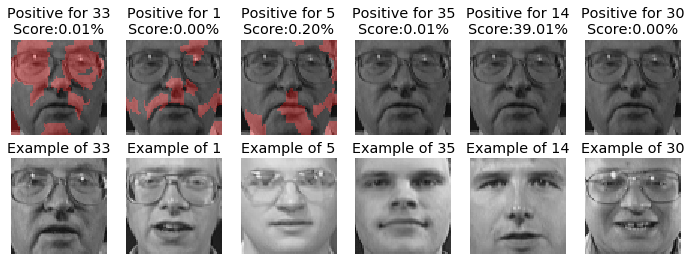

In [ ]:
# 예제 5.22 올리베티 얼굴 테스트 데이터 0번(3번 인물)으로부터 추가 설명을 출력하는 코드

def show_extra_info(test, test_index):

    pipe_pred_test = simple_pipeline.predict(test)
    pipe_pred_prop = simple_pipeline.predict_proba(test)
    # now show them for each class
    fig, m_axs = plt.subplots(2,6, figsize = (12,4))
    for i, (c_ax, gt_ax) in zip(exp.top_labels, m_axs.T):
        temp, mask = exp.get_image_and_mask(
                i,
                positive_only=True,
                num_features=12,
                hide_rest=False,
                min_weight=0.001)

        c_ax.imshow(
                label2rgb(mask,temp, bg_label = 0),
                interpolation = 'nearest')
        c_ax.set_title('Positive for {}\nScore:{:2.2f}%'.format(i, 100*pipe_pred_prop[test_index, i]))

        c_ax.axis('off')

        face_id = np.random.choice(np.where(y_train==i)[0])

        gt_ax.imshow(X_train[face_id])
        gt_ax.set_title('Example of {}'.format(i))
        gt_ax.axis('off')

show_extra_info(X_test, 1)

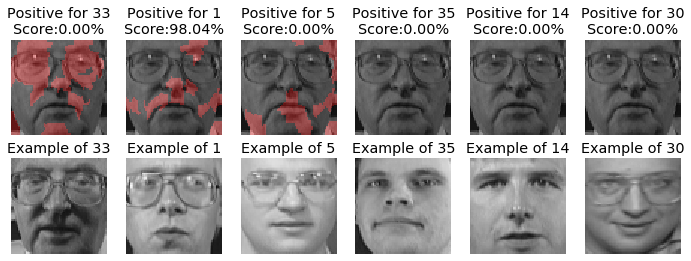

In [ ]:
# 그림 5.36용

show_extra_info(X_test, 25)

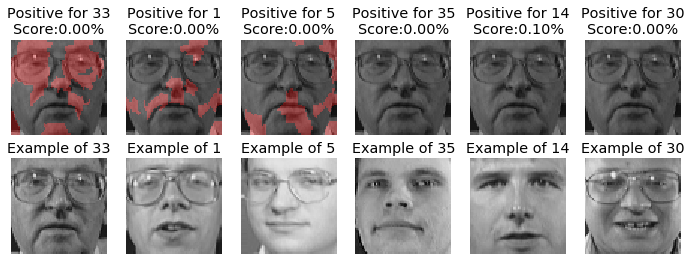

In [ ]:
# 그림 5.37용

show_extra_info(X_test, 101)

In [1]:
# 예제 5.23 SHAP 모듈로부터 보스턴 데이터세트를 불러와서 학습용과 테스트용 데이터세트로 분리하는 코드
%config InlineBackend.figure_format = 'retina'

import shap
from sklearn.model_selection import train_test_split

X, y = shap.datasets.boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train[:10]


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
42    0.14150   0.0   6.91   0.0  0.448  6.169   6.6  5.7209   3.0  233.0   
58    0.15445  25.0   5.13   0.0  0.453  6.145  29.2  7.8148   8.0  284.0   
385  16.81180   0.0  18.10   0.0  0.700  5.277  98.1  1.4261  24.0  666.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232  53.7  5.0141   5.0  398.0   
424   8.79212   0.0  18.10   0.0  0.584  5.565  70.6  2.0635  24.0  666.0   
160   1.27346   0.0  19.58   1.0  0.605  6.250  92.6  1.7984   5.0  403.0   
185   0.06047   0.0   2.46   0.0  0.488  6.153  68.8  3.2797   3.0  193.0   
101   0.11432   0.0   8.56   0.0  0.520  6.781  71.3  2.8561   5.0  384.0   
268   0.54050  20.0   3.97   0.0  0.575  7.470  52.6  2.8720   5.0  264.0   
173   0.09178   0.0   4.05   0.0  0.510  6.416  84.1  2.6463   5.0  296.0   

     PTRATIO       B  LSTAT  
42      17.9  383.37   5.81  
58      19.7  390.68   6.86  
385     20.2  396.90  30.81  
78      18.7  386.40  12.34  
424     20.2    3.65  17.16  
160     14.7  338.92   5.50  
185     17.8  387.11  13.15  
101     20.9  395.58   7.67  
268     13.0  390.30   3.16  
173     16.6  395.50   9.04

Text(0, 0.5, 'MEDV \n Price $1,000')

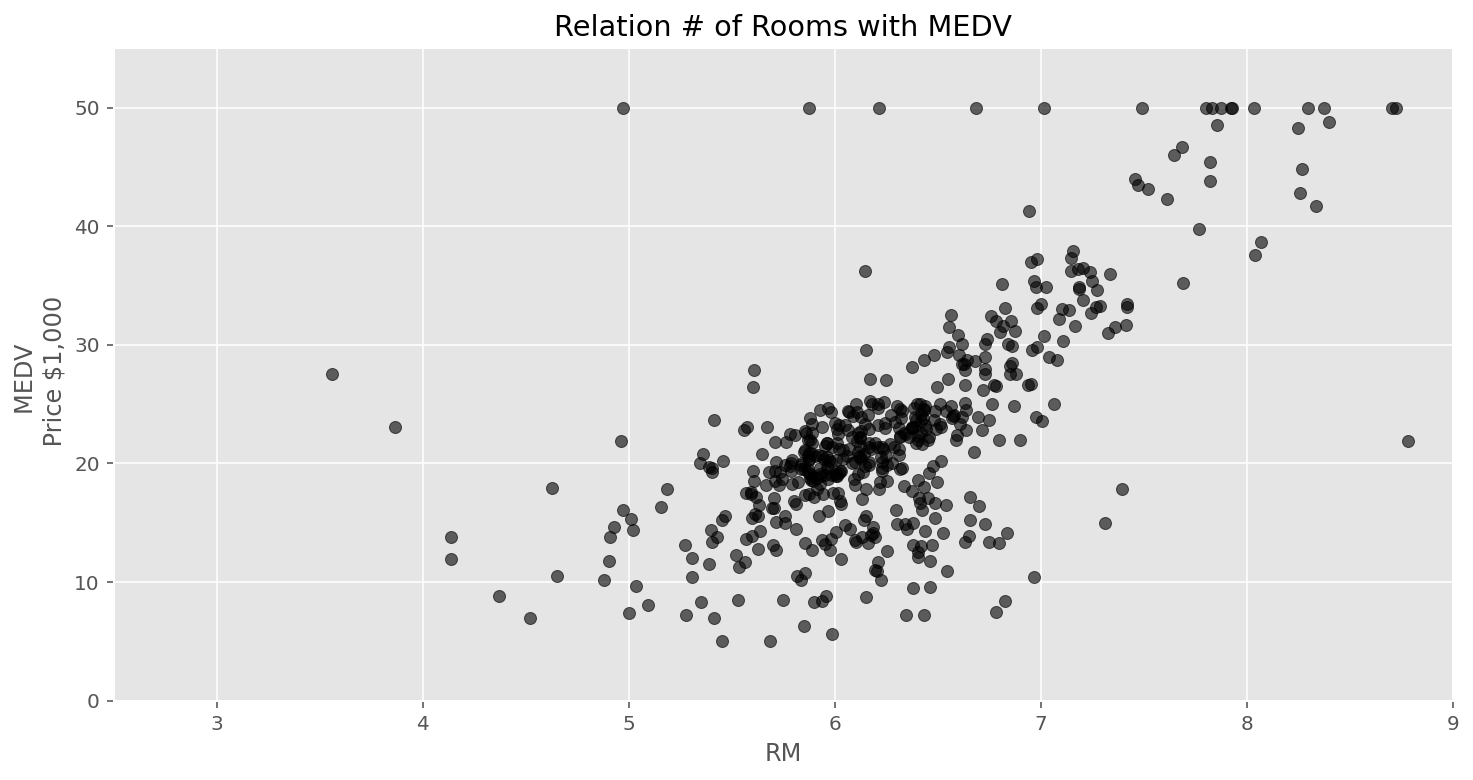

In [2]:
# 예제 5.23 방의 개수와 집값 간의 관계를 산점도로 그리는 코드

# drawing scatter plot
import matplotlib.pylab as plt
import matplotlib

%matplotlib inline

matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')


In [3]:
# 예제 5.38 선형 모델을 이용해서 방 개수와 주택 가격 간의 관계를 구하는 코드

from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_))


a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM -32.40


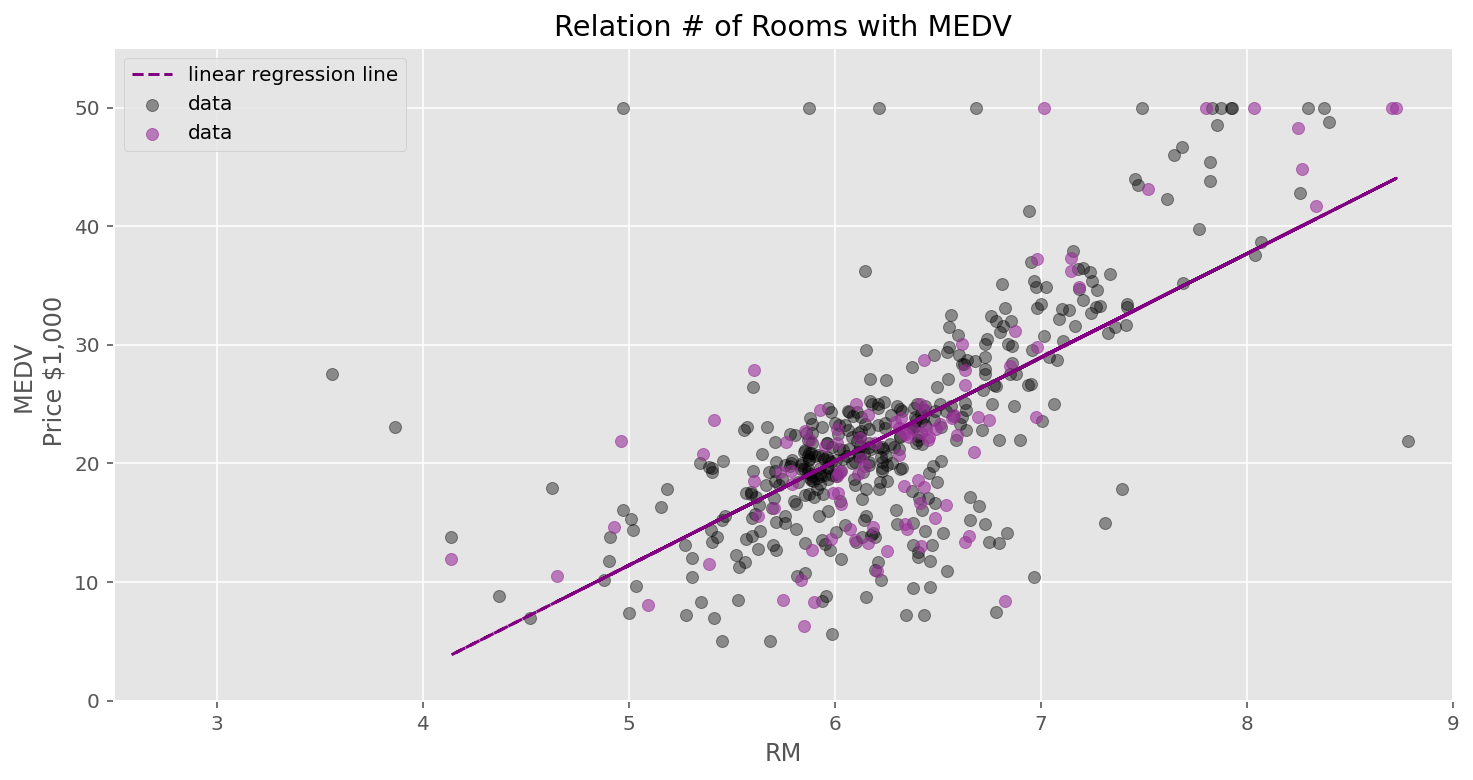

In [4]:
# 예제 5.39 방의 개수가 달라질 때 주택 매매 가격을 예측하는 그래프와 데이터를 한꺼번에 플롯으로 그리는 코드

# scatter Train, Test data with Linear Regression Prediction
fig, ax1 = plt.subplots(1,1, figsize = (12,6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='data')
ax1.scatter(X_test['RM'], y_test, color='#993299', alpha=0.6, label='data')
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')
ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='--', label='linear regression line')
ax1.legend()


In [6]:
# 예제 5.40 모델 예측치와 실제 집값 간의 RMSE를 구하는 코드
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))


RMSE: 6.383135


In [11]:
# 예제 5.41 xgboost의 선형 회귀 모델로 주택 매매 가격을 예측하는 모델을 만들고 학습하는 코드

import xgboost

# train XGBoost model
model = xgboost.XGBRegressor(objective ='reg:linear')
model.fit(X_train, y_train)
preds = model.predict(X_test)


[16:55:04] WARNING: /private/var/folders/gz/9s6243095zqcqfjnxn49ksk40000gn/T/pip-install-g04_q3ex/xgboost/xgboost/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [12]:
# 예제 5.42 전체 피처를 사용해서 학습시킨 모델의 RMSE를 구하는 코드

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 3.006564


In [13]:
# 예제 5.43 SHAP의 설명체를 정의하고 섀플리 값을 계산하는 로직

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
# (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Text(0, 0.5, 'MEDV \n Price $1,000')

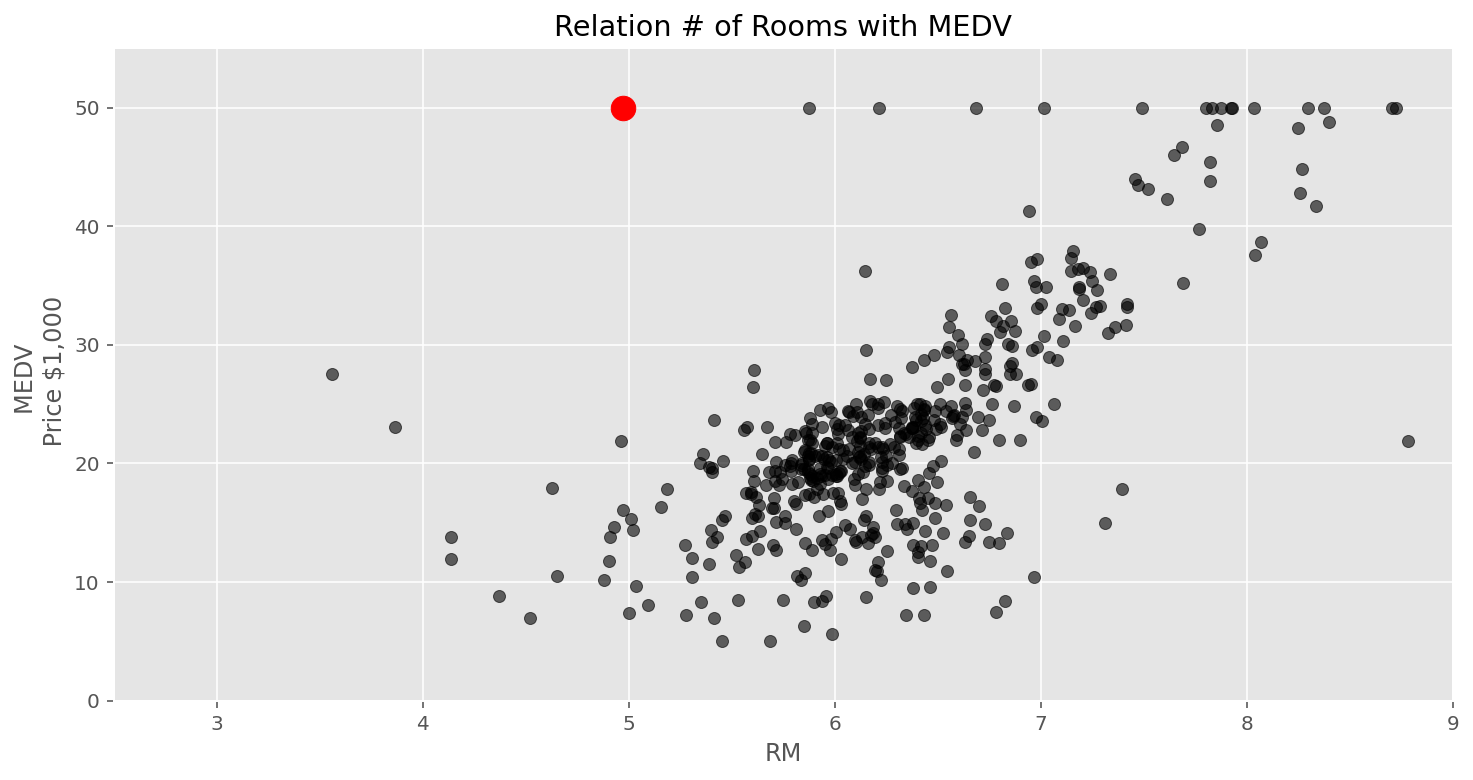

In [14]:
# 예제 5.44 259번 데이터에 대해서 방의 개수(RM)와 집 가격(MEDV)이 어떤 관계가 있는지 플롯으로 그리는 코드

fig, ax1 = plt.subplots(1,1, figsize = (12,6))

idx = 259
ax1.scatter(X['RM'], y, color='black', alpha=0.6)
ax1.scatter(X_train['RM'].iloc[idx], y_train[idx], c='red', s=150)
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')


In [15]:
# 예제 5.45 데이터 259번에 대한 섀플리 영향도를 그리는 코드

# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[259,:], X_train.iloc[259,:])


In [16]:
# 예제 5.46 전체 데이터에 대한 섀플리 값을 플롯으로 그리는 코드

# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)


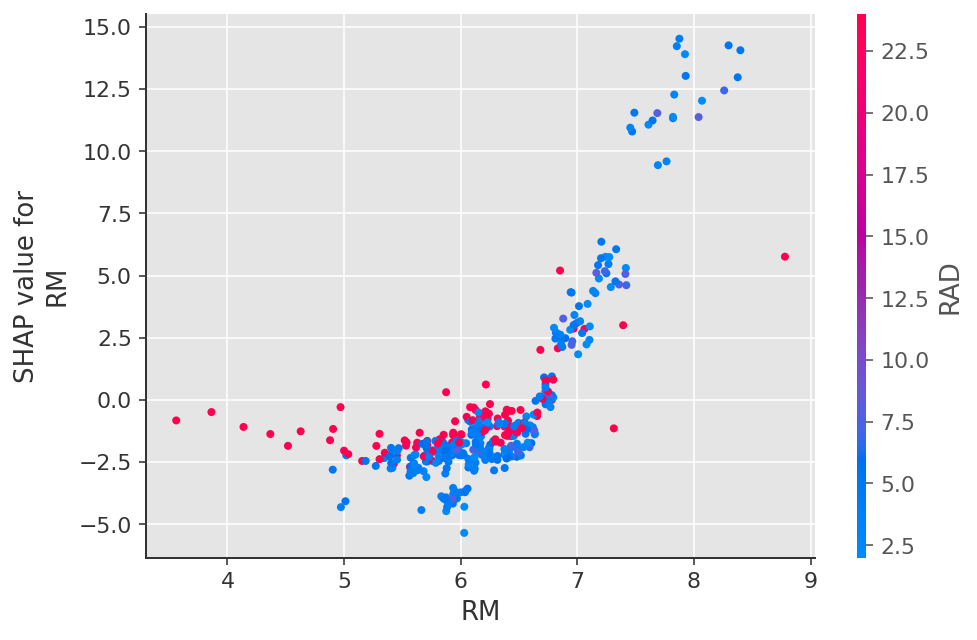

In [17]:
# 예제 5.47 방 개수 피처가 집값에 미치는 섀플리 영향도를 시각화하는 플롯

# create a SHAP dependence plot to show the effect
# of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X_train)


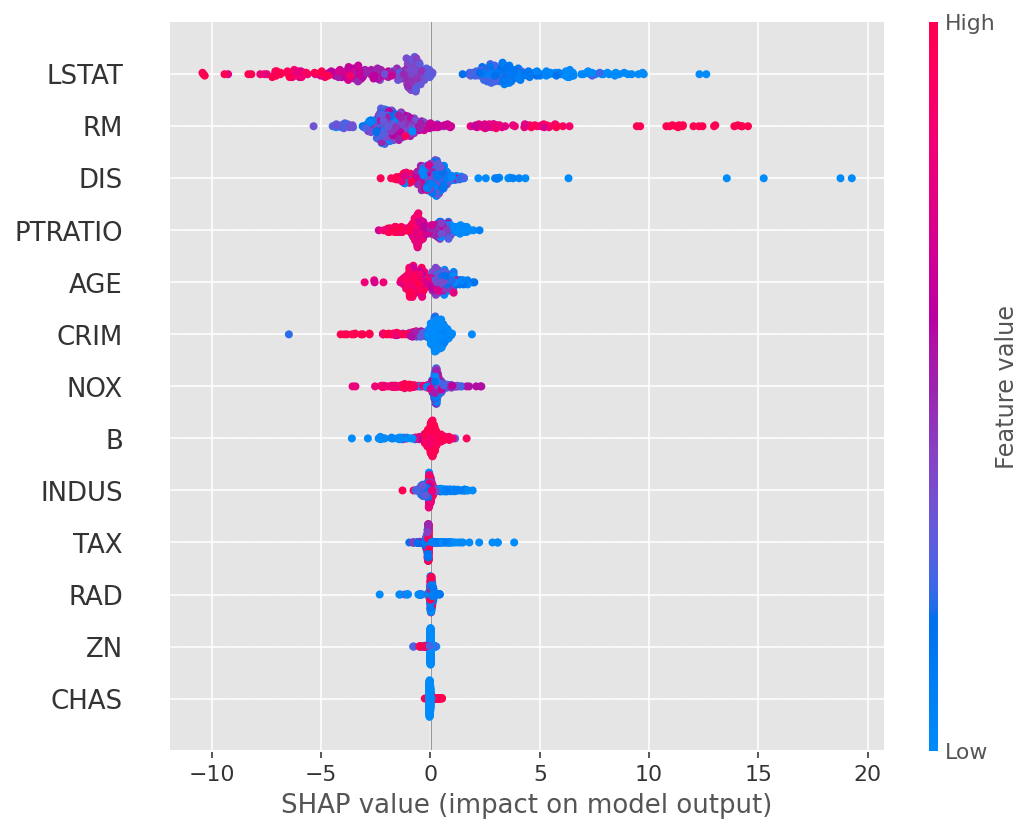

In [18]:
# 예제 5.48 전체 피처들이 섀플리 값 결정에 어떻게 관여하는지 시각화하는 코드

# summarize the effects of all the features

shap.summary_plot(shap_values, X_train)

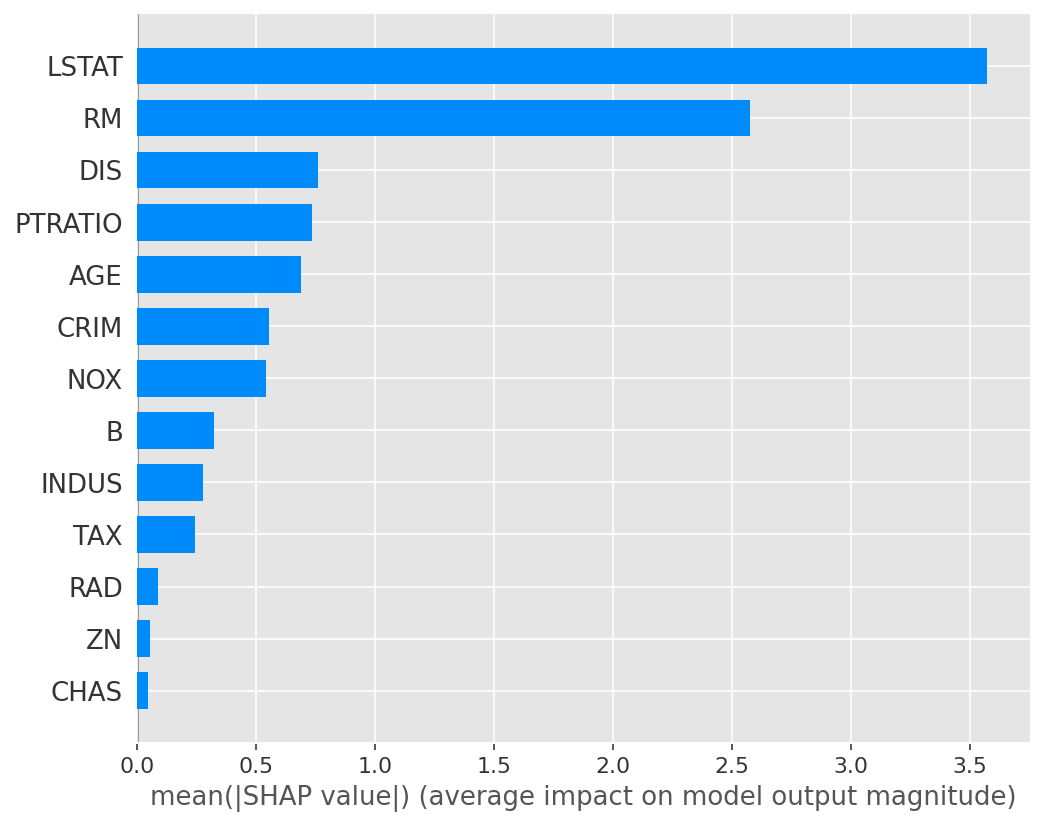

In [19]:
# 예제 5.49 피처별 섀플리 값을 막대 타입으로 비교하는 코드

shap.summary_plot(shap_values, X_train, plot_type="bar")

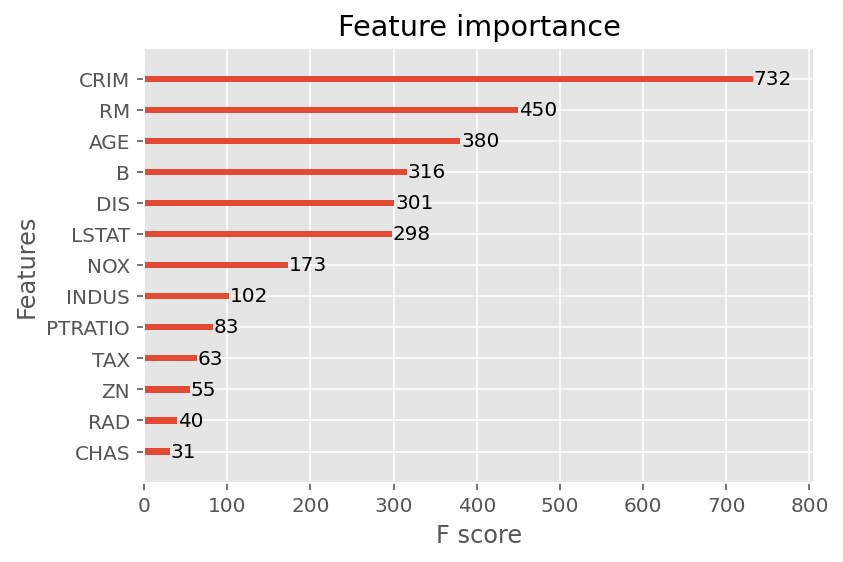

In [20]:
# 예제 5.50 xgboost의 피처 중요도를 호출하는 코드

xgboost.plot_importance(model)